In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

dataset = pd.read_csv('startup_funding.csv', skipinitialspace = True, encoding = 'utf-8')
dataset.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


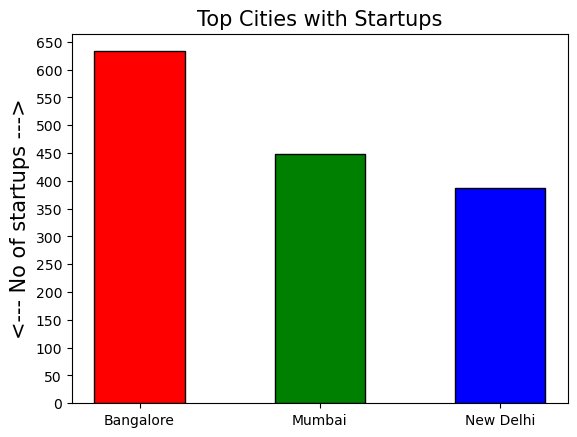

In [11]:
dataset.CityLocation.replace('Delhi', 'New Delhi', inplace = True)
dataset.CityLocation.replace('bangalore', 'Bangalore', inplace = True)
dataset.CityLocation.replace(np.nan, '', inplace = True)

cityLocations = [location.split(' / ')[0] for location in dataset.CityLocation[dataset.CityLocation != '']]
no_of_Startups_City_Wise = Counter(cityLocations)
no_of_Startups_City_Wise['NCR'] = no_of_Startups_City_Wise['New Delhi'] + no_of_Startups_City_Wise['Gurgaon'] + no_of_Startups_City_Wise['Noida']

no_of_Startups_City_Wise = np.array([(city, no_of_startups) for city, no_of_startups in no_of_Startups_City_Wise.items()])
cities = no_of_Startups_City_Wise[:3, 0]
no_of_startups = np.array(no_of_Startups_City_Wise[:3, 1], dtype = int)

plt.bar(cities, no_of_startups, width = 0.5, color = ['Red', 'Green', 'Blue'], edgecolor = 'black')
plt.title('Top Cities with Startups', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(np.arange(0, 670, 50))
plt.ylabel('<--- No of startups --->', fontsize = 15)
plt.show()

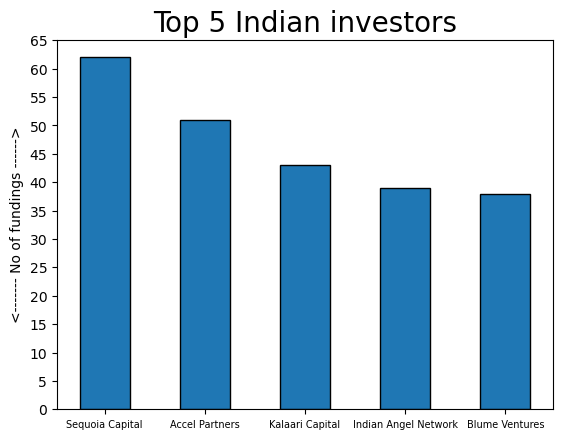

In [3]:
dataset.InvestorsName.replace(np.nan, '', inplace = True)
investorsName = [investor for investor in dataset.InvestorsName[(dataset.InvestorsName != '')] 
                 if 'undisclosed' not in investor.lower()]
investors = list()
for investor in investorsName: investors.extend(investor.split(', '))

investors_With_Funding = list(Counter(investors).items())
investors_With_Funding.sort(reverse = True, key = lambda x:x[1])
investors_With_Funding = np.array(investors_With_Funding)

investors = investors_With_Funding[:5, 0]
no_of_Fundings = np.array(investors_With_Funding[:5, 1], dtype = int)

plt.bar(investors, no_of_Fundings, width = 0.5, edgecolor = 'black')
plt.title('Top 5 Indian investors', fontsize = 20)
plt.ylabel('<------- No of fundings ------>', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(np.arange(0, 66, 5))
plt.show()

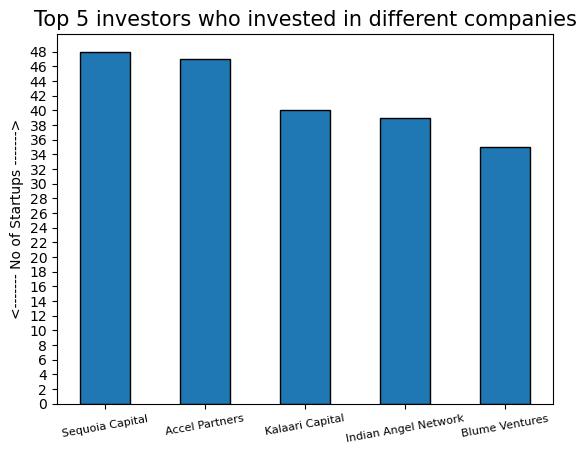

In [4]:
dataset.StartupName.replace('Flipkart.com', 'Flipkart', inplace = True)
dataset.StartupName.replace('Ola Cabs', 'Ola', inplace = True)
dataset.StartupName.replace('Olacabs', 'Ola', inplace = True)
dataset.StartupName.replace('Oyo Rooms', 'Oyo', inplace = True)
dataset.StartupName.replace('OyoRooms', 'Oyo', inplace = True)
dataset.StartupName.replace('Paytm Marketplace', 'Paytm', inplace = True)
dataset.StartupName.fillna('', inplace = True)

investors_Startups_Invested = defaultdict(set)
investorsName = dataset.InvestorsName[(dataset.InvestorsName != '') & (dataset.StartupName != '')] 
startupName = dataset.StartupName[(dataset.InvestorsName != '') & (dataset.StartupName != '')]

for investors, startup in zip(investorsName, startupName):
    for investor in investors.split(', '):
        if 'undisclosed' not in investor.lower(): investors_Startups_Invested[investor].add(startup)

investors_Startups_Invested = [(investor, len(startups)) 
                                for investor, startups in investors_Startups_Invested.items()]

investors_Startups_Invested.sort(reverse = True, key = lambda x: x[1])
investors_Startups_Invested = np.array(investors_Startups_Invested)

investors = investors_Startups_Invested[:5, 0]
no_of_startups = np.array(investors_Startups_Invested[:5, 1], dtype = int)

plt.bar(investors, no_of_startups, width = 0.5, edgecolor = 'black')
plt.title('Top 5 investors who invested in different companies', fontsize = 15)
plt.ylabel('<------- No of Startups ------->', fontsize = 10)
plt.yticks(np.arange(0, 50, 2))
plt.xticks(fontsize = 8, rotation = 10)
plt.show()

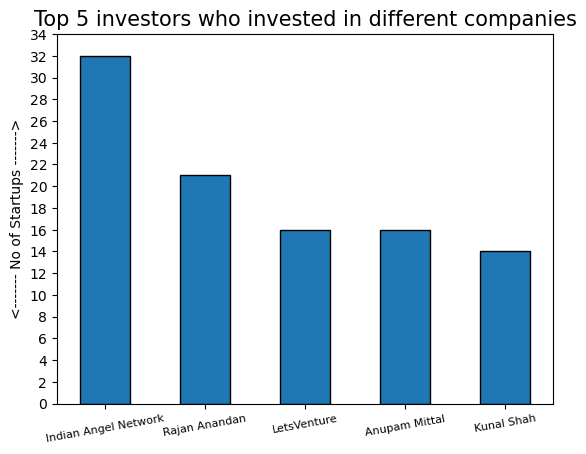

In [8]:
dataset.InvestmentType.replace('Crowd funding', 'Crowd Funding', inplace = True)
dataset.InvestmentType.replace('PrivateEquity', 'Private Equity', inplace = True)
dataset.InvestmentType.replace('SeedFunding', 'Seed Funding', inplace = True)
dataset.InvestmentType.fillna('', inplace = True)

condition = ((dataset.InvestorsName != '') & (dataset.StartupName != '') 
             & ((dataset.InvestmentType == 'Seed Funding') | (dataset.InvestmentType == 'Crowd Funding')))

investorsName = dataset.InvestorsName[condition] 
startupName = dataset.StartupName[condition]

investors_Startups_Invested = defaultdict(set)
for investors, startup in zip(investorsName, startupName):
    for investor in investors.split(', '):
        if 'undisclosed' not in investor.lower(): investors_Startups_Invested[investor].add(startup)

investors_Startups_Invested = [(investor, len(startups)) 
                                for investor, startups in investors_Startups_Invested.items()]

investors_Startups_Invested.sort(reverse = True, key = lambda x: x[1])
investors_Startups_Invested = np.array(investors_Startups_Invested)

investors = investors_Startups_Invested[:5, 0]
no_of_startups = np.array(investors_Startups_Invested[:5, 1], dtype = int)

plt.bar(investors, no_of_startups, width = 0.5, edgecolor = 'black')
plt.title('Top 5 investors who invested in different companies', fontsize = 15)
plt.ylabel('<------- No of Startups ------->', fontsize = 10)
plt.yticks(np.arange(0, 35, 2))
plt.xticks(fontsize = 8, rotation = 10)
plt.show()

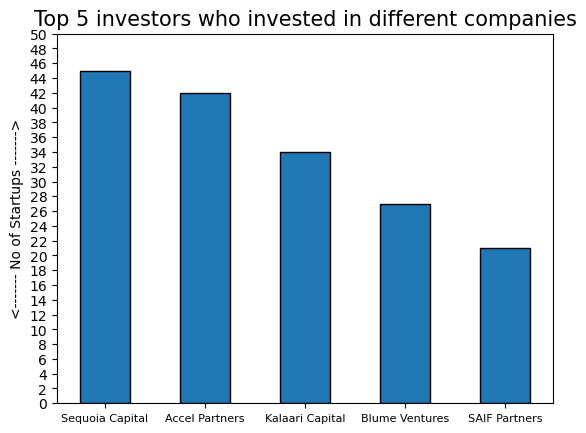

In [9]:
condition = ((dataset.InvestorsName != '') & (dataset.StartupName != '')
                & (dataset.InvestmentType == 'Private Equity'))

investorsName = investorsName = dataset.InvestorsName[condition] 
startupName = dataset.StartupName[condition]

investors_Startups_Invested = defaultdict(set)
for investors, startup in zip(investorsName, startupName):
    for investor in investors.split(', '):
        if 'undisclosed' not in investor.lower(): investors_Startups_Invested[investor].add(startup)

investors_Startups_Invested = [(investor, len(startups)) 
                                for investor, startups in investors_Startups_Invested.items()]

investors_Startups_Invested.sort(reverse = True, key = lambda x: x[1])
investors_Startups_Invested = np.array(investors_Startups_Invested)

investors = investors_Startups_Invested[:5, 0]
no_of_startups = np.array(investors_Startups_Invested[:5, 1], dtype = int)

plt.bar(investors, no_of_startups, width = 0.5, edgecolor = 'black')
plt.title('Top 5 investors who invested in different companies', fontsize = 15)
plt.ylabel('<------- No of Startups ------->', fontsize = 10)
plt.yticks(np.arange(0, 51, 2))
plt.xticks(fontsize = 8)
plt.show()